In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
# 화면에 그래프 그리기
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=12)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (15,9)

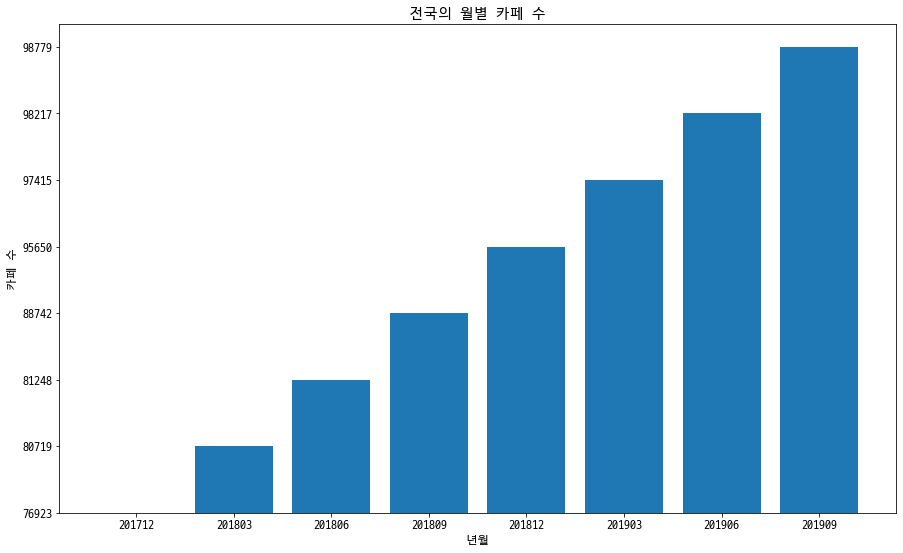

In [2]:
# 1.
with open('cafe_2year.csv', 'r', encoding='utf-8') as f:
    lines = csv.reader(f)
    header = next(lines)
    x_data = []
    y_data = []
    for line in lines:
        if '12' in line[0] or '03' in line[0] or '06' in line[0] or '09' in line[0]:
            x_data.append(line[0])
            y_data.append(line[1])


plt.bar(x_data, y_data)
plt.title('전국의 월별 카페 수')
plt.xlabel('년월')
plt.ylabel('카페 수')
plt.show()

In [3]:
# 2.
class Prac_Files:
    def __init__(self):
        self.f = open('doctor_2019.csv', 'r', encoding='utf-8')

    def header(self, f):
        lines = csv.reader(self.f)
        header = next(lines)
        data_set = np.array([header])
        data_set = np.delete(data_set, 1)
        return data_set

    def location_sum(self, f, location):
        data_set = [0, 0, 0, 0]
        lines = csv.reader(self.f)

        for line in lines:
            if line[0] == location:
                for i in range(len(data_set)):
                    data_set[i] += int(line[i+2])
        return data_set

    def close(self):
        self.f.close()
    
f = Prac_Files();
data = np.empty((0,5))
data = np.append(data, f.header(f))
location = ['서울', '부산', '대구', '인천', '대전', '광주', '울산']
for i in range(len(location)):
    f = Prac_Files();
    data = np.append(data, location[i])
    data = np.append(data, f.location_sum(f, location[i]))
data = data.reshape(8, 5).tolist()

for i in range(len(data)):
    for j in range(len(data[0])):
        print(data[i][j], end=' ')
    print()
f.close()

지역 일반의 수 인턴 수 레지던트 수 전문의 수 
서울 162 1196 4757 9375 
부산 58 197 785 2211 
대구 27 215 712 1436 
인천 47 138 444 1518 
대전 25 142 425 1006 
광주 16 102 356 1006 
울산 19 23 104 467 


In [4]:
# 3.  
with open('doctor2.csv','w',encoding='utf8') as f:
    for i in range(len(data)):
        for j in range(len(data[i])):
            if j == len(data[i])-1:
                f.write(data[i][j])
                break
            else:
                f.write(data[i][j])
                f.write(',')
        f.writelines('\n')
    print('doctor2.csv 파일 쓰기 완료')

doctor2.csv 파일 쓰기 완료


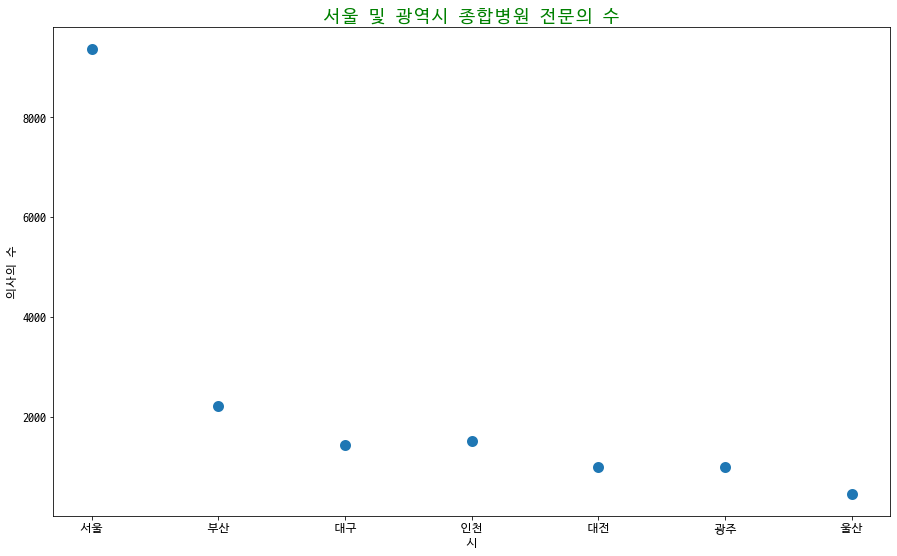

In [5]:
# 4.
x_data = []
y_data = []
title_font = {'size':18,'weight':'bold', 'color':'green'}
with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)

    for line in lines:
        x_data.append(line[0])
        y_data.append(int(line[-1]))
        
plt.scatter(x_data, y_data, linewidth = 5)
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=title_font)
plt.xlabel('시')
plt.ylabel('의사의 수')

plt.show()

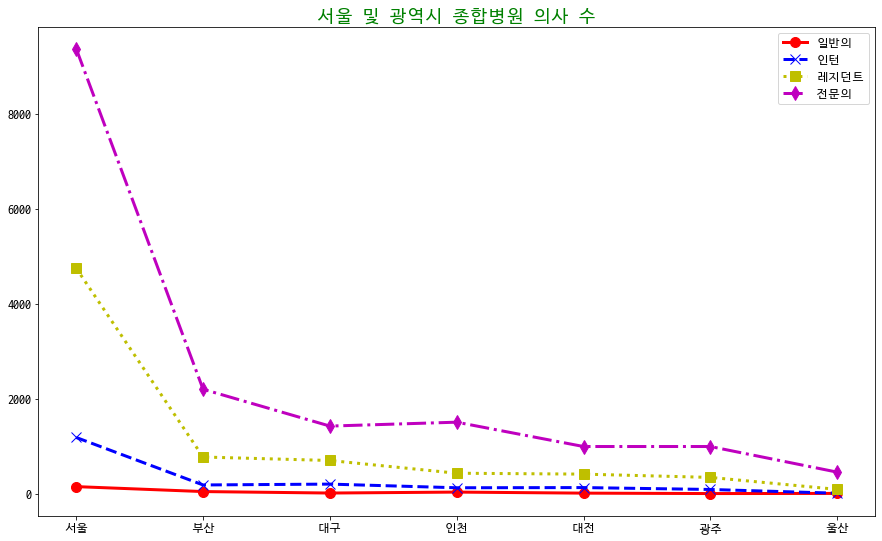

In [6]:
# 5.

x_data = []
y1_data = []
y2_data = []
y3_data = []
y4_data = []

with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)

    for line in lines:
        x_data.append(line[0])
        y1_data.append(int(line[1]))
        y2_data.append(int(line[2]))
        y3_data.append(int(line[3]))
        y4_data.append(int(line[4]))

plt.plot(x_data, y1_data, 'ro-', label='일반의', linewidth =3, markersize=10)
plt.plot(x_data, y2_data, 'bx--',label='인턴', linewidth =3, markersize=10)
plt.plot(x_data, y3_data, 'ys:', label='레지던트',linewidth =3, markersize=10)
plt.plot(x_data, y4_data, 'md-.', label='전문의',linewidth =3, markersize=10)
plt.title('서울 및 광역시 종합병원 의사 수',fontdict=title_font)
plt.legend(loc='best')

plt.show()

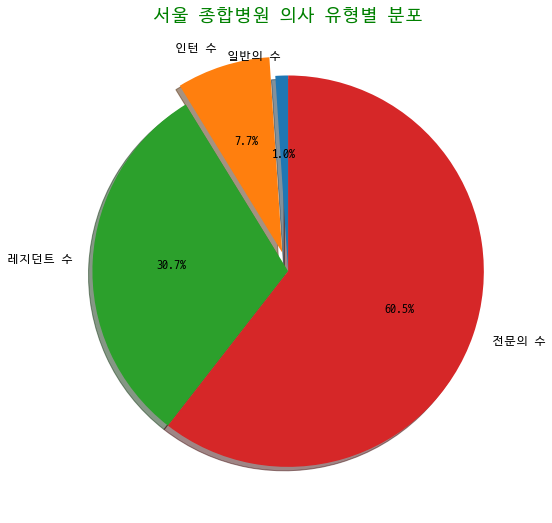

In [7]:
# 6.

x_data = []
y_data = [0,0,0,0]

with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)
    for i in range(1, len(header)):
        x_data.append(header[i])
    
    for line in lines:
        if '서울' in line:
            for i in range(len(y_data)):
                y_data[i] += int(line[i+1])
  
y_data2 = []
sum = 0

for i in range(len(y_data)):
    sum += y_data[i]
    
for i in range(len(y_data)):
    y_data2.append(y_data[i] /  sum * 100)

plt.title('서울 종합병원 의사 유형별 분포',fontdict=title_font)
plt.pie(y_data2, explode = (0, 0.1, 0, 0), labels=x_data, autopct='%1.1f%%', shadow=True, startangle = 90)

plt.show()

In [24]:
import pandas as pd

df = pd.read_csv('doctor_2019.csv', skiprows=[0], names=['지역', '병원명', '일반의', '인턴', '레지던트', '전문의'])
df

,지역,병원명,일반의,인턴,레지던트,전문의
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182
...,...,...,...,...,...,...
350,서울,홍익병원,1,4,14,55
351,강원,홍천아산병원,1,0,0,10
352,경기,효산의료재단 안양샘병원,7,5,17,86
353,경기,효산의료재단 지샘병원,2,0,2,72


In [25]:
dfx = df

In [56]:
dfx.loc[dfx.index == 1]

,지역,병원명,일반의,인턴,레지던트,전문의
1,서울,강북삼성병원,6,28,137,204


In [9]:
df = df.drop(['병원명'], axis=1)
df

,지역,일반의,인턴,레지던트,전문의
0,인천,1,22,68,201
1,서울,6,28,137,204
2,서울,1,37,164,225
3,대구,5,77,209,225
4,경남,1,35,114,182
...,...,...,...,...,...
350,서울,1,4,14,55
351,강원,1,0,0,10
352,경기,7,5,17,86
353,경기,2,0,2,72


In [10]:
df

,지역,일반의,인턴,레지던트,전문의
0,인천,1,22,68,201
1,서울,6,28,137,204
2,서울,1,37,164,225
3,대구,5,77,209,225
4,경남,1,35,114,182
...,...,...,...,...,...
350,서울,1,4,14,55
351,강원,1,0,0,10
352,경기,7,5,17,86
353,경기,2,0,2,72


In [57]:
df = df.groupby(['지역']).sum()

In [58]:
df

,일반의,인턴,레지던트,전문의
지역,,,,
강원,34,88,309,857
경기,130,458,1836,5471
경남,38,103,315,1473
경북,37,3,45,929
광주,16,102,356,1006
대구,27,215,712,1436
대전,25,142,425,1006
부산,58,197,785,2211
서울,162,1196,4757,9375


In [13]:
# df = df.set_index('지역')

In [59]:
df2 = df.loc[['서울','부산','대구','인천','대전','광주','울산']]

In [60]:
df2

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


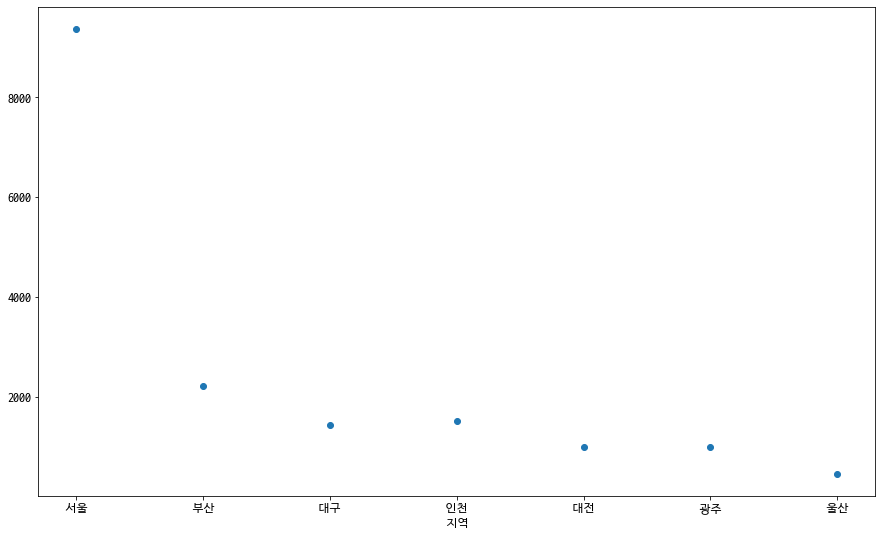

In [16]:
df2['전문의'].plot(marker = 'o', linewidth=0)
plt.show()

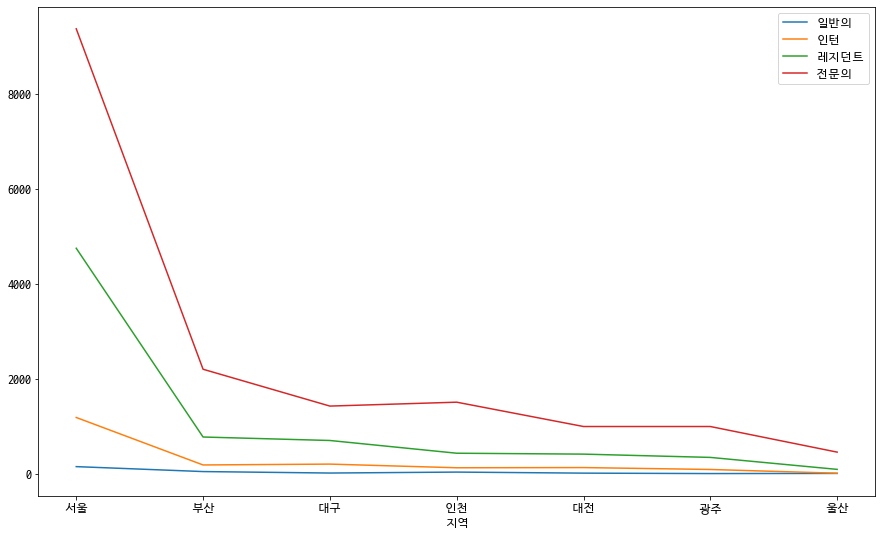

In [17]:
df2.plot()
plt.show()

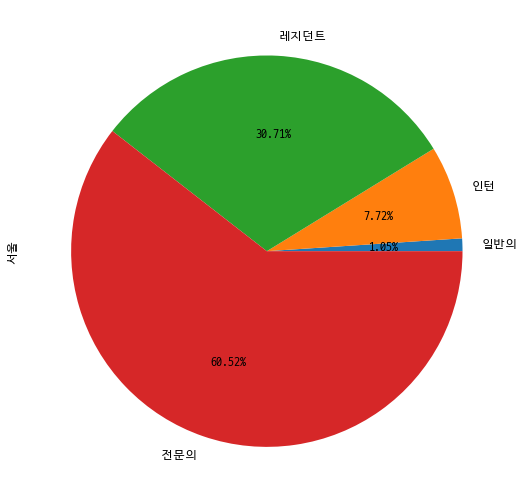

In [18]:
df2.loc['서울'].plot.pie(autopct='%.2f%%')
plt.show()

In [19]:
cdf = pd.read_csv('cafe_2year.csv', skiprows=[0], names=['기준월', '카페수'])
cdf

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967
5,201803,80719
6,201804,80719
7,201805,87156
8,201806,81248
9,201807,82191


In [20]:
cdf = cdf.iloc[2::3].reset_index(drop=True)

In [21]:
cdf

,기준월,카페수
0,201712,76923
1,201803,80719
2,201806,81248
3,201809,88742
4,201812,95650
5,201903,97415
6,201906,98217
7,201909,98779


In [22]:
cdf = cdf.set_index('기준월')
cdf

,카페수
기준월,
201712,76923
201803,80719
201806,81248
201809,88742
201812,95650
201903,97415
201906,98217
201909,98779


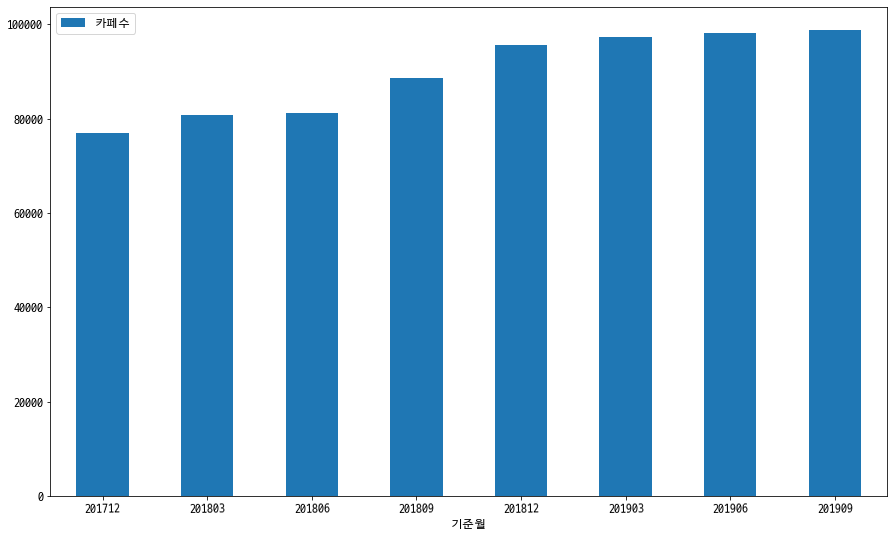

In [23]:
cdf.plot.bar(rot = 1)
plt.show()